In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import sympy as sym
import os
from IPython.display import Image

# 直交補空間に対応した計量ベクトル空間

In [5]:
from npmath.space import CH5_MetricVectorSpace, RealVector
    
V = CH5_MetricVectorSpace(RealVector, ndim=3)
x, y = V.take(np.array([1, 2, 3]), np.array([4, 5, 6]))

phi = V.ortho_complement()
print(type(phi).__name__)
print(phi.take(1))

W = V.subspace(ndim=2)
W_oc = W.ortho_complement()

print("W ndim:   ", W.ndim)
print("W_oc ndim:", W_oc.ndim)

x, y = W.take(np.array([10, 6, 0]), np.array([7, 1, 0]))
z = W_oc.take(np.array([0, 0, 5]))

print(x, y, z)
print("<x, y>:   ", V.dot(x, y))
print("<x, z>:   ", V.dot(x, z))
print("<y, z>:   ", V.dot(y, z))

EmptySet
None
W ndim:    2
W_oc ndim: 1
RealVector([10  6  0]) RealVector([7 1 0]) RealVector([0 0 5])
<x, y>:    76
<x, z>:    0
<y, z>:    0


In [4]:
try:
    W = V.subspace(ndim=2)
    x = W.take(np.array([10, 6, 1]))
except Exception as e:
    print(f"{e.__class__.__name__}: {e}")

try:
    W_oc = V.subspace(ndim=2).ortho_complement()
    z = W_oc.take(np.array([1, 0, 0]))
except Exception as e:
    print(f"{e.__class__.__name__}: {e}")

NdimMismatchedError: 
NdimMismatchedError: 


In [5]:
W_oc_oc = W_oc.ortho_complement()
print("W_oc_oc ndim:", W_oc_oc.ndim)
x, y = W_oc_oc.take(np.array([10, 6, 0]), np.array([7, 1, 0]))

W_oc_oc_oc = W_oc_oc.ortho_complement()
print("W_oc_oc_oc ndim:", W_oc_oc_oc.ndim)
z = W_oc_oc_oc.take(np.array([0, 0, 5]))

W_oc_oc ndim: 2
W_oc_oc_oc ndim: 1


In [6]:
V = CH5_MetricVectorSpace(RealVector, ndim=3)
W = V.subspace(ndim=2)
W_oc = W.ortho_complement()
x = W.take(np.array([10, 6, 0]))
y = W_oc.take(np.array([0, 0, 5]))

z = x + y
print(z)
z_dash = V.take(z.value)
z_dash == z

RealVector([10  6  5])


array([ True,  True,  True])

In [7]:
x = sym.symbols('x')
f = sym.Piecewise(
    (x, (x >= -sym.pi) & (x < 1)), 
    (10, sym.Eq(x, 1)),
    (x, (x > 1) & (x <= sym.pi))
)

display(f)
display(f.subs(x, 1-1e-11))
sym.integrate(f, (x, -sym.pi, sym.pi))

Piecewise((x, (x < 1) & (x >= -pi)), (10, Eq(x, 1)), (x, (x <= pi) & (x > 1)))

0.999999999990000

0

# ヒルベルト空間 - $L^2(a, b)$

In [32]:
from npmath.space import PiecewiseContinuousFunction, L2Space

x, n = sym.symbols('x n')
I = sym.Interval(-sym.pi, sym.pi).closure
L2 = L2Space(I)
f = L2.take(sym.sin(x), symbols=[x])

g = L2.take(sym.Piecewise(
    (x, (x >= I.inf) & (x < 1)),
    (10, sym.Eq(x, 1)),
    (x, (x > 1) & (x <= I.sup))
), symbols=[x])

print("<f, g>: ", L2.dot(f, g, x).evalf())
print("‖f‖:    ", L2.norm(f, x).evalf())
print("‖f - g‖:", L2.distance(f, g, x).evalf())

<f, g>:  6.28318530717959
‖f‖:     1.77245385090552
‖f - g‖: 3.35351653632877


parsing /Users/noppoman/WorkingPlace/program/math/learning-functional-analysis-with-python/notebook/npmath/space.py...


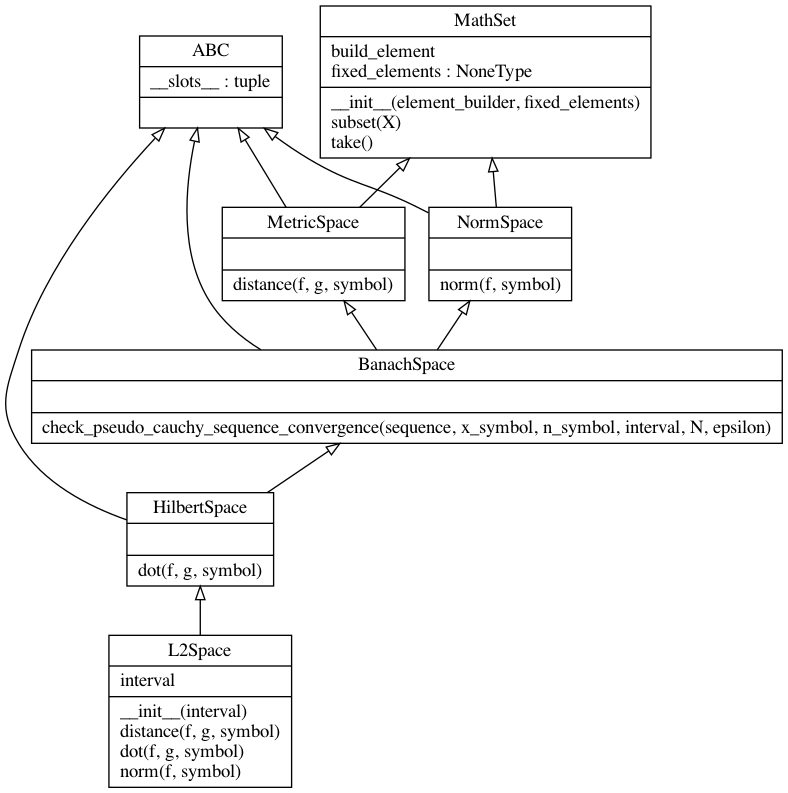

In [9]:
class_name = "L2Space"
!pyreverse -o png -c {class_name} -mn -f ALL {os.getcwd()}/npmath/space.py
Image(f"./{class_name}.png")

## 完全正規直交系

In [31]:
f, g = L2.take(sym.sin(n * x), sym.cos(n*x), symbols=[x, x])

print("<sin(x), cos(x)>:  ", L2.dot(f.subs(n, 1), g.subs(n, 1), x).evalf())
print("<cos(x), cos(2x)>: ", L2.dot(g.subs(n, 1), g.subs(n, 2), x).evalf())
print("<cos(2x), cos(2x)>:", L2.dot(g.subs(n, 2), g.subs(n, 2), x).evalf())
print("<sin(x), sin(2x)>: ", L2.dot(f.subs(n, 1), f.subs(n, 2), x).evalf())
print("<sin(2x), sin(2x)>:", L2.dot(f.subs(n, 2), f.subs(n, 2), x).evalf())

<sin(x), cos(x)>:   0
<cos(x), cos(2x)>:  0
<cos(2x), cos(2x)>: 3.14159265358979
<sin(x), sin(2x)>:  0
<sin(2x), sin(2x)>: 3.14159265358979


# フーリエ展開

In [11]:
def periodic_quadratic_function(x, L):
    # f(x)=x^2, f(x+2*L)=f(x)
    x = (x + L) % (L * 2) - L
    f = x**2
    
    return f

In [12]:
f = periodic_quadratic_function(x, sym.pi)

print(f.evalf(subs={x: 1}))
print(f.evalf(subs={x: 1 + 2*sym.pi}))

1.00000000000000
1.00000000000000


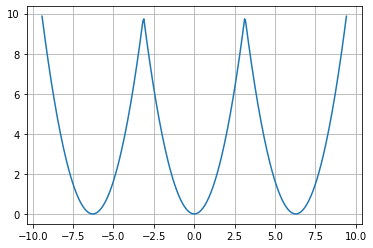

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x_min = -3*np.pi
x_max = 3*np.pi

domain = np.linspace(x_min, x_max, 300)
y = list(map(lambda d: f.evalf(subs={x: d}), domain))
plt.grid()
plt.plot(domain, y)
plt.show()

In [14]:
def fourier_series_of_quadratic_function(x, n):
    _n = sym.symbols('n')
    f = (-1)**_n * (4/_n**2) * sym.cos(_n * x)
    return (sym.pi**2/3) + sym.summation(f, (_n, 1, n))

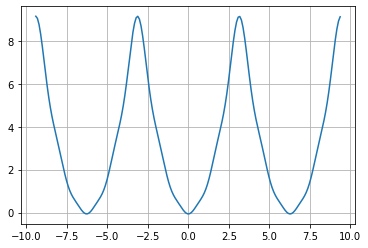

In [15]:
domain = np.arange(x_min, x_max, 0.1)
f = fourier_series_of_quadratic_function(x, n=5)
y = list(map(lambda d: f.subs(x, d), domain))

plt.plot(domain, y)
plt.grid()
plt.show()

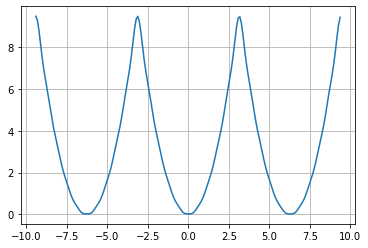

In [16]:
f = fourier_series_of_quadratic_function(x, n=10)
y = list(map(lambda d: f.evalf(subs={x: d}), domain))

plt.plot(domain, y)
plt.grid()
plt.show()

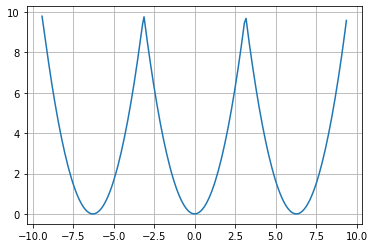

In [17]:
f = fourier_series_of_quadratic_function(x, n=50)
y = list(map(lambda d: f.evalf(subs={x: d}), domain))

plt.plot(domain, y)
plt.grid()
plt.show()

## ベッセルの不等式

In [17]:
x = sym.symbols('x')
I = sym.Interval(-sym.pi, sym.pi)
L2 = L2Space(I)

f = PiecewiseContinuousFunction(fourier_series_of_quadratic_function(x, n=10), I, x, True)
g  = L2.take(x**2, symbols=[x])

f_d = float(L2.dot(f, f, x).evalf())
g_d = float(L2.dot(g, g, x).evalf())

print("f_d:", f_d)
print("g_d:", g_d)
print("f_d ≦ g_d:", f_d <= g_d)

f_d: 122.39346530263937
g_d: 122.40787391411259
f_d ≦ g_d: True
